<a href="https://colab.research.google.com/github/SherZhou/Computational-Physics/blob/main/1_1moon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font  face=Times color=darkblue size=3>Euler After discretization: $t=t_n=n*\tau$ 
    <br>So, $$\vec x(n+1)=\vec x(n)+\tau\vec v_x(n)$$ 
    $$\vec y(n+1)=\vec y(n)+\tau\vec v_y(n)$$ 
    $$\vec v_x(n+1)=\vec v_x(n)+\tau\vec a_x(n)\quad \vec a_x(n)=-\frac{μ}{r^3}\vec x $$  
    $$⃗\vec v_y(n+1)=\vec v_y(n)+\tau\vec a_y(n)\quad \vec a_y(n)=-\frac{μ}{r^3}\vec y$$
    $$r=\sqrt{x^2+y^2} $$
    $$v=\sqrt{v_x^2+v_y^2}$$
    <br>$$a = 1,M = 1,m = 0.0123,e = 0.0549,μ = G(M + m)= 0.05288$$
    <br> set $$x(0) = a(1 − e), y(0) = 0, v_x(0) = 0, v_y(0) = \sqrt{μ(1 + e)/[a(1 − e)]}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#set initial consitions
a = 1
M = 1
m = 0.0123
e = 0.0549
miu = 0.05288
t_eu=np.zeros((3,24*60*60))
vx_eu=np.zeros((3,24*60*60))
vy_eu=np.zeros((3,24*60*60))
c1=np.full((3,1),pow(miu*(1+e)/(a*(1-e)),1/2))
vy_eu[:,[0]]=c1
x_eu=np.zeros((3,24*60*60))
c2=np.full((3,1),a*(1-e))
x_eu[:,[0]]=c2
y_eu=np.zeros((3,24*60*60))
v_eu=np.zeros((3,24*60*60))
r_eu=np.zeros((3,24*60*60))
c3=np.full((3,1),pow(pow(vx_eu[0][0],2)+pow(vy_eu[0][0],2),1/2))
c4=np.full((3,1),pow(pow(x_eu[0][0],2)+pow(y_eu[0][0],2),1/2))
v_eu[:,[0]]=c3
r_eu[:,[0]]=c4
tau=[0.05,0.1,0.5]

In [ ]:
for j in range(3):  
  for i in range(1,24*60*60-1):
    #print(i,j)
    
    t_eu[j][i]=tau[j]*i

    x_eu[j][i]=x_eu[j][i-1]+tau[j]*vx_eu[j][i-1]
    y_eu[j][i]=y_eu[j][i-1]+tau[j]*vy_eu[j][i-1]
    vx_eu[j][i]=vx_eu[j][i-1]+tau[j]*(-miu*x_eu[j][i-1]/pow(r_eu[j][i-1],3))
    vy_eu[j][i]=vy_eu[j][i-1]+tau[j]*(-miu*y_eu[j][i-1]/pow(r_eu[j][i-1],3))

    v_eu[j][i]=pow(pow(vx_eu[j][i],2)+pow(vy_eu[j][i],2),1/2)
    r_eu[j][i]=pow(pow(x_eu[j][i],2)+pow(y_eu[j][i],2),1/2)
    #e_eu.append(0.5*0.0123*(pow(vx_eu[i],2)+pow(vx_eu[i],2))+6.67*pow(10,-11)*0.0123/pow(pow(x_eu[i],2)+pow(y_eu[i],2),1/2))'''

Text(0.5, 1.0, 'Euler method')

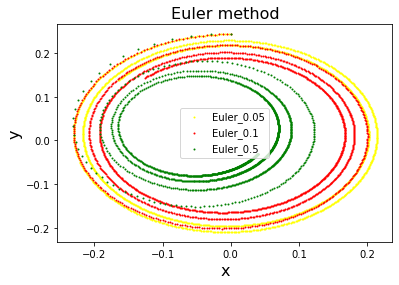

In [ ]:
plt.scatter(vx_eu[0][:24*60],vy_eu[0][:24*60],color='yellow',s=1,label='Euler_0.05')
plt.scatter(vx_eu[1][:24*60],vy_eu[1][:24*60],color='red',s=1,label='Euler_0.1')
plt.scatter(vx_eu[2][:24*60],vy_eu[2][:24*60],color='green',s=1,label='Euler_0.5')
plt.legend()
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.title('Euler method',size=16)

<font  face=Times color=darkblue size=3> The Verlet method, use the centered 3-point formula, we get:
$$\vec x(n+1)=2\vec x(n)-\vec x(n-1)+\tau^2\vec a_x(n) + O(\tau^4)$$ 
$$\vec y(n+1)=2\vec y(n)-\vec yn-1)+\tau^2\vec a_y(n) + O(\tau^4)$$
$$r(n+1)=\sqrt{x^2(n+1)+y^2(n+1)}$$
$$\vec v_x(n)=\frac{\vec x(n+1)-\vec x(n-1)}{2\tau} + O(\tau^2)$$
$$\vec v_y(n)=\frac{\vec y(n+1)-\vec y(n-1)}{2\tau} + O(\tau^2)$$
$$v(n)=\sqrt{v_x^2(n)+v_y^2(n)}$$
and 
$$\vec{x}(-1)=\vec{x}(0)-\tau\vec v_x(0)+\frac{\tau^2}{2}\vec a_x(0)$$
$$\vec{y}(-1)=\vec{y}(0)-\tau\vec v_y(0)+\frac{\tau^2}{2}\vec a_y(0)$$
to start the iteration.

<font  face=Times color=darkblue size=3>
<br> Then, we can simply derive the Velocity Verlet Method from the Verlet method :
$$\vec x(n+1)=\vec x(n)+\tau\vec v_x(n)+\frac{1}{2}\tau^2\vec a_x(n)$$
$$\vec y(n+1)=\vec y(n)+\tau\vec v_y(n)+\frac{1}{2}\tau^2\vec a_y(n)$$
$$r(n+1)=\sqrt{x^2(n+1)+y^2(n+1)}$$
$$\vec v_x(n+1)=\vec v_x(n)+\frac{1}{2}\tau(\vec a_x(n)+\vec a_x(n+1))$$
$$\vec v_y(n+1)=\vec v_y(n)+\frac{1}{2}\tau(\vec a_y(n)+\vec a_y(n+1))$$
$$v(n+1)=\sqrt{v_x^2(n+1)+v_y^2(n+1)}$$
<br>which is self-starting.

<font  face=Times color=darkblue size=3>
<br> The third one is the Leap-Frog method:
$$\vec v_x(n+\frac{1}{2})=\vec v_x(n-\frac{1}{2})+\tau\vec a_x(n) + O(\tau^3)$$
$$\vec v_y(n+\frac{1}{2})=\vec v_y(n-\frac{1}{2})+\tau\vec a_y(n) + O(\tau^3)$$
$$v(n+\frac{1}{2})=\sqrt{v_x^2(n+\frac{1}{2})+v_y^2(n+\frac{1}{2})}$$
$$\vec x(n+1) = \vec x(n) + \tau\vec v_x(n+\frac{1}{2})+ O(\tau^4) $$
$$\vec y(n+1) = \vec y(n) + \tau\vec v_y(n+\frac{1}{2})+ O(\tau^4) $$
$$r(n+1)=\sqrt{x^2(n+1)+y^2(n+1)}$$
start the iteration with $$\vec v_x(-\frac{1}{2})=\vec v_x(0) - \frac{1}{2}\tau\vec a_x(0)$$$$\vec v_y(-\frac{1}{2})=\vec v_y(0) - \frac{1}{2}\tau\vec a_y(0)$$.

In [ ]:
#set initial consitions
a = 1
M = 1
m = 0.0123
e = 0.0549
miu = 0.05288
t_v=np.zeros((3,24*60*60))
vx_v=np.zeros((3,24*60*60))
vy_v=np.zeros((3,24*60*60))
c1=np.full((3,1),pow(miu*(1+e)/(a*(1-e)),1/2))
vy_v[:,[0]]=c1
x_v=np.zeros((3,24*60*60))
c2=np.full((3,1),a*(1-e))
x_v[:,[0]]=c2
y_v=np.zeros((3,24*60*60))
v_v=np.zeros((3,24*60*60))
r_v=np.zeros((3,24*60*60))
c3=np.full((3,1),pow(pow(vx_eu[0][0],2)+pow(vy_eu[0][0],2),1/2))
c4=np.full((3,1),pow(pow(x_eu[0][0],2)+pow(y_eu[0][0],2),1/2))
v_v[:,[0]]=c3
r_v[:,[0]]=c4
tau=[0.1,1,2]

In [ ]:
x_v_last=[x_v[0][0]-tau[0]*vx_v[0][0]+0.5*np.power(tau[0],2)*-miu*x_v[0][0]/pow(r_v[0][0],3),
          x_v[1][0]-tau[1]*vx_v[1][0]+0.5*np.power(tau[1],2)*-miu*x_v[1][0]/pow(r_v[1][0],3),
          x_v[2][0]-tau[2]*vx_v[2][0]+0.5*np.power(tau[2],2)*-miu*x_v[2][0]/pow(r_v[2][0],3)
          ]  #x(-1)

In [ ]:
y_v_last=[y_v[0][0]-tau[0]*vy_v[0][0]+0.5*np.power(tau[0],2)*-miu*y_v[0][0]/pow(r_v[0][0],3),
          y_v[1][0]-tau[1]*vy_v[1][0]+0.5*np.power(tau[1],2)*-miu*y_v[1][0]/pow(r_v[1][0],3),
          y_v[2][0]-tau[2]*vy_v[2][0]+0.5*np.power(tau[2],2)*-miu*y_v[2][0]/pow(r_v[2][0],3)
          ]  #Y(-1)

In [ ]:
for j in range(3):
  for i in range(1,24*60*60-1):
      t_v[j][i]=tau[j]*i
      if i==1:
          x_v[j][i]=2*x_v[j][i-1]-x_v_last[j]+np.power(tau[j],2)*-miu*x_v[j][i-1]/pow(r_v[j][i-1],3)
          y_v[j][i]=2*y_v[j][i-1]-y_v_last[j]+np.power(tau[j],2)*-miu*y_v[j][i-1]/pow(r_v[j][i-1],3)

          r_v[j][i]=pow(pow(x_v[j][i],2)+pow(y_v[j][i],2),1/2)
          vx_v[j][i]=0.5*(x_v[j][i]-x_v_last[j])/tau[j]
          vy_v[j][i]=0.5*(y_v[j][i]-y_v_last[j])/tau[j]
          v_v[j][i]=pow(pow(vx_v[j][i],2)+pow(vy_v[j][i],2),1/2)
      else:
          x_v[j][i]=2*x_v[j][i-1]-x_v[j][i-2]+np.power(tau[j],2)*-miu*x_v[j][i-1]/pow(r_v[j][i-1],3)
          y_v[j][i]=2*y_v[j][i-1]-y_v[j][i-2]+np.power(tau[j],2)*-miu*y_v[j][i-1]/pow(r_v[j][i-1],3)
          r_v[j][i]=pow(pow(x_v[j][i],2)+pow(y_v[j][i],2),1/2)
          vx_v[j][i]=0.5*(x_v[j][i]-x_v[j][i-2])/tau[j]
          vy_v[j][i]=0.5*(y_v[j][i]-y_v[j][i-2])/tau[j]
          v_v[j][i]=pow(pow(vx_v[j][i],2)+pow(vy_v[j][i],2),1/2)

Text(0.5, 1.0, 'verlet method')

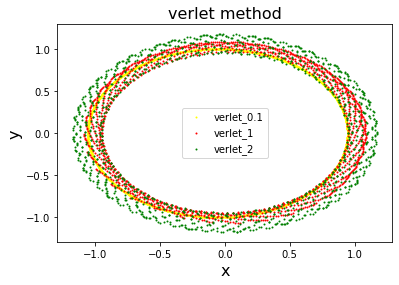

In [ ]:
plt.scatter(x_v[0][:24*60],y_v[0][:24*60],color='yellow',s=1,label='verlet_0.1')
plt.scatter(x_v[1][:24*60],y_v[1][:24*60],color='red',s=1,label='verlet_1')
plt.scatter(x_v[2][:24*60],y_v[2][:24*60],color='green',s=1,label='verlet_2')
plt.legend()
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.title('verlet method',size=16)

The most popular one is 4-th order Runge-Kutta method:
    \begin{equation}
    \begin{aligned}
    \\& kx_1=\tau v_x(n)
    \\& ky_1=\tau v_y(n)
    \\& lx_1=\tau a_x(n)
    \\& ly_1=\tau a_y(n)
    \\& kx_2=\tau(v_x(n)+\frac{1}{2}lx_1)
    \\& ky_2=\tau(v_x(n)+\frac{1}{2}ly_1)
    \\& lx_2=\tau a_x(x(n)+\frac{1}{2}kx_1,v_x(n)+\frac{1}{2}lx_1,t+\frac{1}{2}\tau)
    \\& ly_2=\tau a_y(y(n)+\frac{1}{2}ky_1,v_y(n)+\frac{1}{2}ly_1,t+\frac{1}{2}\tau)
    \\& kx_3=\tau (v_x(n)+\frac{1}{2}lx_2)
    \\& ky_3=\tau (v_y(n)+\frac{1}{2}ly_2)
    \\& lx_3=\tau a_x(x(n)+\frac{1}{2}kx_2,v_x(n)+\frac{1}{2}lx_2,t+\frac{1}{2}\tau)
    \\& ly_3=\tau a_y(y(n)+\frac{1}{2}ky_2,v_y(n)+\frac{1}{2}ly_2,t+\frac{1}{2}\tau)
    \\& kx_4=\tau (v_x(n)+lx_3)
    \\& ky_4=\tau (v_y(n)+ly_3)
    \\& lx_4=\tau a_x(x(n)+kx_3,v_x(n)+lx_3,t+\tau)
    \\& ly_4=\tau a_y(x(n)+ky_3,v_y(n)+ly_3,t+\tau)
    \end{aligned}
    \end{equation}

Put together, we have,
  $$x(n+1)=x(n)+\frac{1}{6}(kx_1+2kx_2+2kx_3+kx_4)$$
  $$y(n+1)=y(n)+\frac{1}{6}(ky_1+2ky_2+2ky_3+ky_4)$$
  $$r(n+1)=\sqrt{x^2(n+1)+y^2(n+1)}$$
  $$v_x(n+1)=v_x(n)+\frac{1}{6}(lx_1+2lx_2+2lx_3+lx_4)$$
  $$v_y(n+1)=v_y(n)+\frac{1}{6}(ly_1+2ly_2+2ly_3+ly_4)$$
  $$v(n+1)=\sqrt{v_x^2(n+1)+v_y^2(n+1)}$$

In [ ]:
#initial condition
t_rk=[0]
vx_rk=[0]
vy_rk=[pow(miu*(1+e)/(a*(1-e)),1/2)]
v_rk=[pow(pow(vx_rk[0],2)+pow(vy_rk[0],2),1/2)]
x_rk=[a*(1-e)]
y_rk=[0]
r_rk=[pow(pow(x_rk[0],2)+pow(y_rk[0],2),1/2)]

In [ ]:
#set initial consitions
a = 1
M = 1
m = 0.0123
e = 0.0549
miu = 0.05288
t_rk=np.zeros((3,24*60*60))
vx_rk=np.zeros((3,24*60*60))
vy_rk=np.zeros((3,24*60*60))
c1=np.full((3,1),pow(miu*(1+e)/(a*(1-e)),1/2))
vy_rk[:,[0]]=c1
x_rk=np.zeros((3,24*60*60))
c2=np.full((3,1),a*(1-e))
x_rk[:,[0]]=c2
y_rk=np.zeros((3,24*60*60))
v_rk=np.zeros((3,24*60*60))
r_rk=np.zeros((3,24*60*60))
c3=np.full((3,1),pow(pow(vx_eu[0][0],2)+pow(vy_eu[0][0],2),1/2))
c4=np.full((3,1),pow(pow(x_eu[0][0],2)+pow(y_eu[0][0],2),1/2))
v_rk[:,[0]]=c3
r_rk[:,[0]]=c4
tau=[0.5,1,2]
kx1=[0,0,0]
kx2=[0,0,0]
kx3=[0,0,0]
kx4=[0,0,0]
ky1=[0,0,0]
ky2=[0,0,0]
ky3=[0,0,0]
ky4=[0,0,0]
lx1=[0,0,0]
lx2=[0,0,0]
lx3=[0,0,0]
lx4=[0,0,0]
ly1=[0,0,0]
ly2=[0,0,0]
ly3=[0,0,0]
ly4=[0,0,0]

In [ ]:
for j in range(3):
  for i in range(1,24*60*60):
      t_rk[j][i]=tau[j]*i
      kx1[j]=tau[j]*vx_rk[j][i-1]
      ky1[j]=tau[j]*vy_rk[j][i-1]

      lx1[j]=tau[j]*-miu*x_rk[j][i-1]/pow(r_rk[j][i-1],3)
      ly1[j]=tau[j]*-miu*y_rk[j][i-1]/pow(r_rk[j][i-1],3)

      kx2[j]=tau[j]*(vx_rk[j][i-1]+0.5*lx1[j])
      ky2[j]=tau[j]*(vy_rk[j][i-1]+0.5*ly1[j])

      lx2[j]=tau[j]*-miu*(x_rk[j][i-1]+0.5*kx1[j])/pow(r_rk[j][i-1],3)
      ly2[j]=tau[j]*-miu*(y_rk[j][i-1]+0.5*ky1[j])/pow(r_rk[j][i-1],3)

      kx3[j]=tau[j]*(vx_rk[j][i-1]+0.5*lx2[j])
      ky3[j]=tau[j]*(vy_rk[j][i-1]+0.5*ly2[j])

      lx3[j]=tau[j]*-miu*(x_rk[j][i-1]+0.5*kx2[j])/pow(r_rk[j][i-1],3)
      ly3[j]=tau[j]*-miu*(y_rk[j][i-1]+0.5*ky2[j])/pow(r_rk[j][i-1],3)
      
      kx4[j]=tau[j]*(vx_rk[j][i-1]+lx3[j])
      ky4[j]=tau[j]*(vy_rk[j][i-1]+ly3[j])

      lx4[j]=tau[j]*-miu*(x_rk[j][i-1]+kx3[j])/pow(r_rk[j][i-1],3)
      ly4[j]=tau[j]*-miu*(y_rk[j][i-1]+ky3[j])/pow(r_rk[j][i-1],3)

      x_rk[j][i]=x_rk[j][i-1]+(1/6)*(kx1[j]+2*kx2[j]+2*kx3[j]+kx4[j])
      y_rk[j][i]=y_rk[j][i-1]+(1/6)*(ky1[j]+2*ky2[j]+2*ky3[j]+ky4[j])
      r_rk[j][i]=pow(pow(x_rk[j][i],2)+pow(y_rk[j][i],2),1/2)

      vx_rk[j][i]=vx_rk[j][i-1]+(1/6)*(lx1[j]+2*lx2[j]+2*lx3[j]+lx4[j])
      vy_rk[j][i]=vy_rk[j][i-1]+(1/6)*(ly1[j]+2*ly2[j]+2*ly3[j]+ly4[j])
      v_rk[j][i]=pow(pow(vx_rk[j][i],2)+pow(vy_rk[j][i],2),1/2)

  #   E_rk.append(0.5*k*np.power(x_rk[i],2)+0.5*m*np.power(v_rk[i],2))

(-2.0, 2.0)

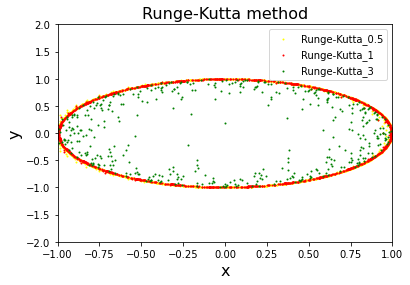

In [ ]:
plt.scatter(x_rk[0][:24*60],y_rk[0][:24*60],color='yellow',s=1,label='Runge-Kutta_0.5')
plt.scatter(x_rk[1][:24*60],y_rk[1][:24*60],color='red',s=1,label='Runge-Kutta_1')
plt.scatter(x_rk[2][:24*60],y_rk[2][:24*60],color='green',s=1,label='Runge-Kutta_3')
plt.legend()
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.title('Runge-Kutta method',size=16)
plt.xlim(-1,1)
plt.ylim(-2,2)

COMPARISION

(-2.0, 2.0)

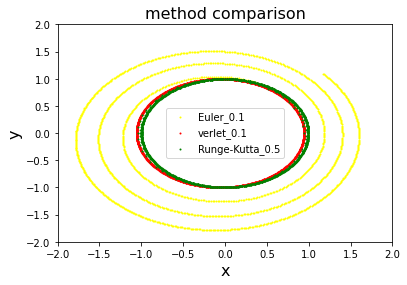

In [ ]:
plt.scatter(x_eu[1][:24*60],y_eu[1][:24*60],color='yellow',s=1,label='Euler_0.1')
plt.scatter(x_v[0][:24*60],y_v[0][:24*60],color='red',s=1,label='verlet_0.1')
plt.scatter(x_rk[0][:24*60],y_rk[0][:24*60],color='green',s=1,label='Runge-Kutta_0.5')
plt.legend()
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.title('method comparison',size=16)
plt.xlim(-2,2)
plt.ylim(-2,2)

(-2.0, 2.0)

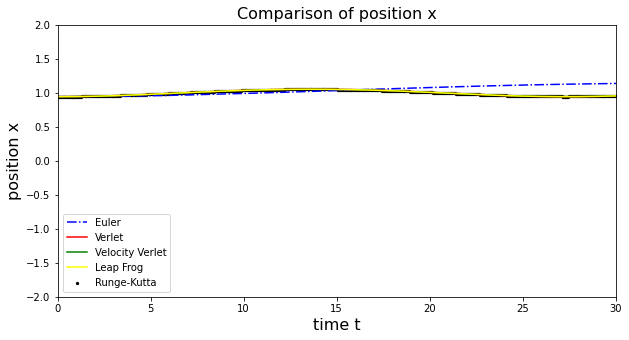

In [ ]:
#postion x plot
plt.figure(figsize=(10,5))
plt.plot(t_eu,r_eu,'-.',c='blue',label='Euler')
plt.plot(t_v,r_v,color='red',label='Verlet')
plt.plot(t_v,r_vv,color='green',label='Velocity Verlet')
plt.plot(t_v,r_lf,color='yellow',label='Leap Frog')
plt.scatter(t_rk,r_rk,color='black',s=5,label='Runge-Kutta')
plt.legend()
plt.xlabel('time t',size=16)
plt.ylabel('position x',size=16)
plt.title('Comparison of position x',size=16)
plt.xlim(0,30)
plt.ylim(-2,2)

(-2.0, 2.0)

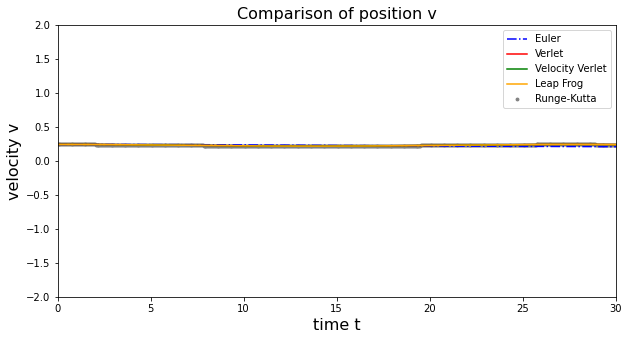

In [ ]:
#velocity v plot
plt.figure(figsize=(10,5))
plt.plot(t_eu,v_eu,'-.',c='blue',label='Euler')
plt.plot(t_v,v_v,color='red',label='Verlet')
plt.plot(t_v,v_vv,color='green',label='Velocity Verlet')
plt.plot(t_v,v_lf,color='orange',label='Leap Frog')
plt.scatter(t_rk,v_rk,color='grey',s=8,label='Runge-Kutta')
plt.legend()
plt.xlabel('time t',size=16)
plt.ylabel('velocity v',size=16)
plt.title('Comparison of position v',size=16)
plt.xlim(0,30)
plt.ylim(-2,2)